## GPD model example
---

Example showing how to create a GPD model, load pretrained weights from the SeisBench repository and annotate a waveform.

**Current version of the model API is incomplete and subject to change.**

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('./', os.pardir)))

In [2]:
import numpy as np
import torch
import obspy

from seisbench.models import GPD, WaveformModel

In [3]:
model = GPD()

In [4]:
waveforms = torch.randn(10, 3, 400)

In [5]:
model(waveforms)

tensor([[0.4737, 0.1581, 0.3682],
        [0.4388, 0.3681, 0.1931],
        [0.4532, 0.1432, 0.4036],
        [0.5026, 0.1192, 0.3782],
        [0.3181, 0.4452, 0.2367],
        [0.2985, 0.2837, 0.4179],
        [0.3239, 0.2863, 0.3897],
        [0.5040, 0.2790, 0.2170],
        [0.5419, 0.2242, 0.2339],
        [0.3199, 0.3428, 0.3373]], grad_fn=<SoftmaxBackward>)

In [6]:
model.load_pretrained("dummy")

In [7]:
print(model.weights_docstring)

Randomly initialized model without any training. Just for debug purpose.

Jannes Münchmeyer (munchmej@gfz-potsdam.de)


In [8]:
print(model)

Component order:	ZNE
SeisBench model		gpd

GPD(
  (conv1): Conv1d(3, 32, kernel_size=(21,), stride=(1,))
  (bn1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv1d(32, 64, kernel_size=(21,), stride=(1,))
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv1d(64, 128, kernel_size=(21,), stride=(1,))
  (bn3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv1d(128, 256, kernel_size=(21,), stride=(1,))
  (bn4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=1536, out_features=200, bias=True)
  (bn5): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=200, out_features=200, bias=True)
  (bn6): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=200, out_features=3, bias=T

In [9]:
stream = obspy.read()

In [10]:
annotations = model.annotate(stream)

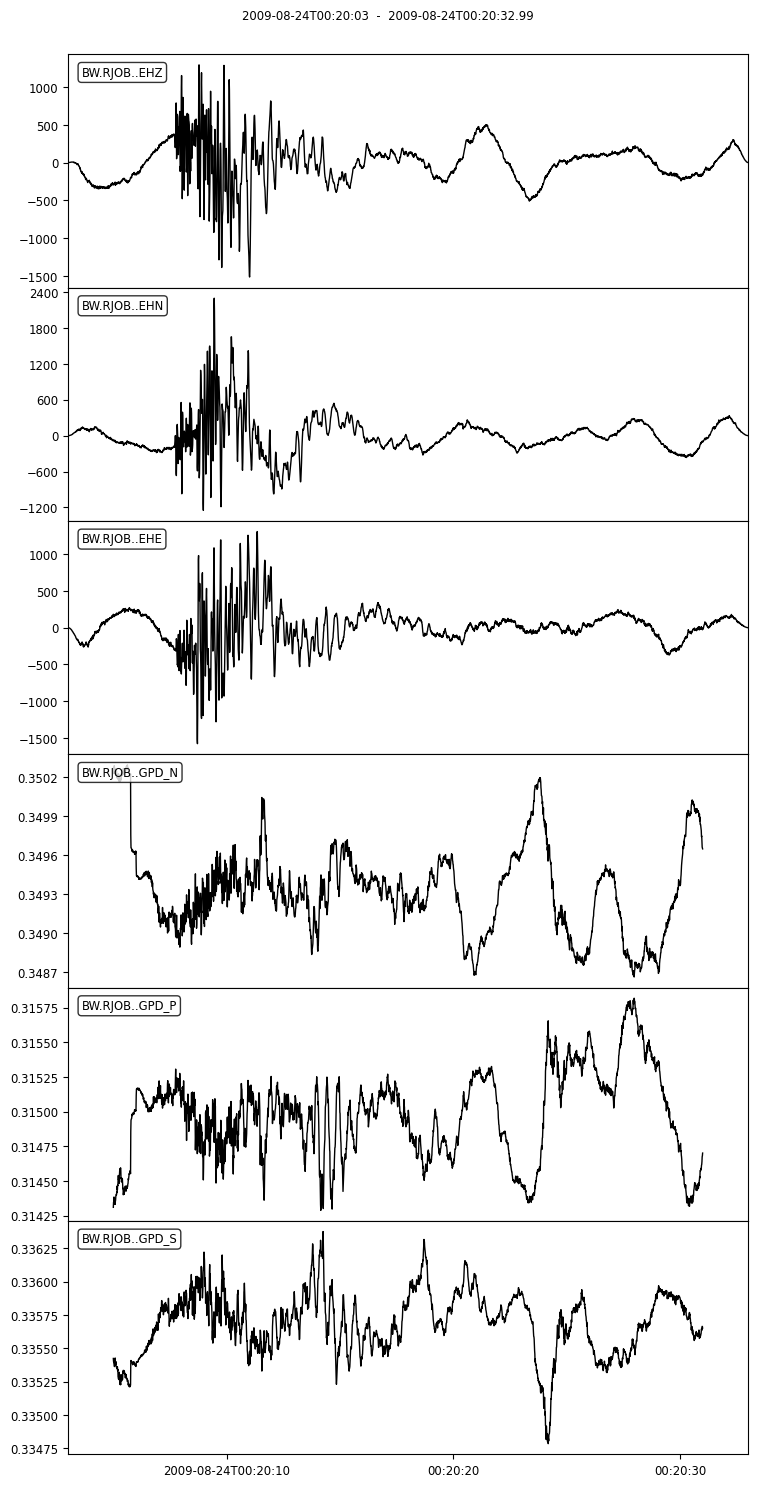

In [11]:
(stream + annotations).plot(equal_scale=False);

In [12]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime

In [13]:
client = Client("GFZ")

t = UTCDateTime("2014/04/02")

stream = client.get_waveforms(network="CX", station="PB01", location="*", channel="HH?", starttime=t, endtime=t+120)
stream += client.get_waveforms(network="CX", station="PB02", location="*", channel="HH?", starttime=t, endtime=t+120)

In [14]:
annotations = model.annotate(stream)

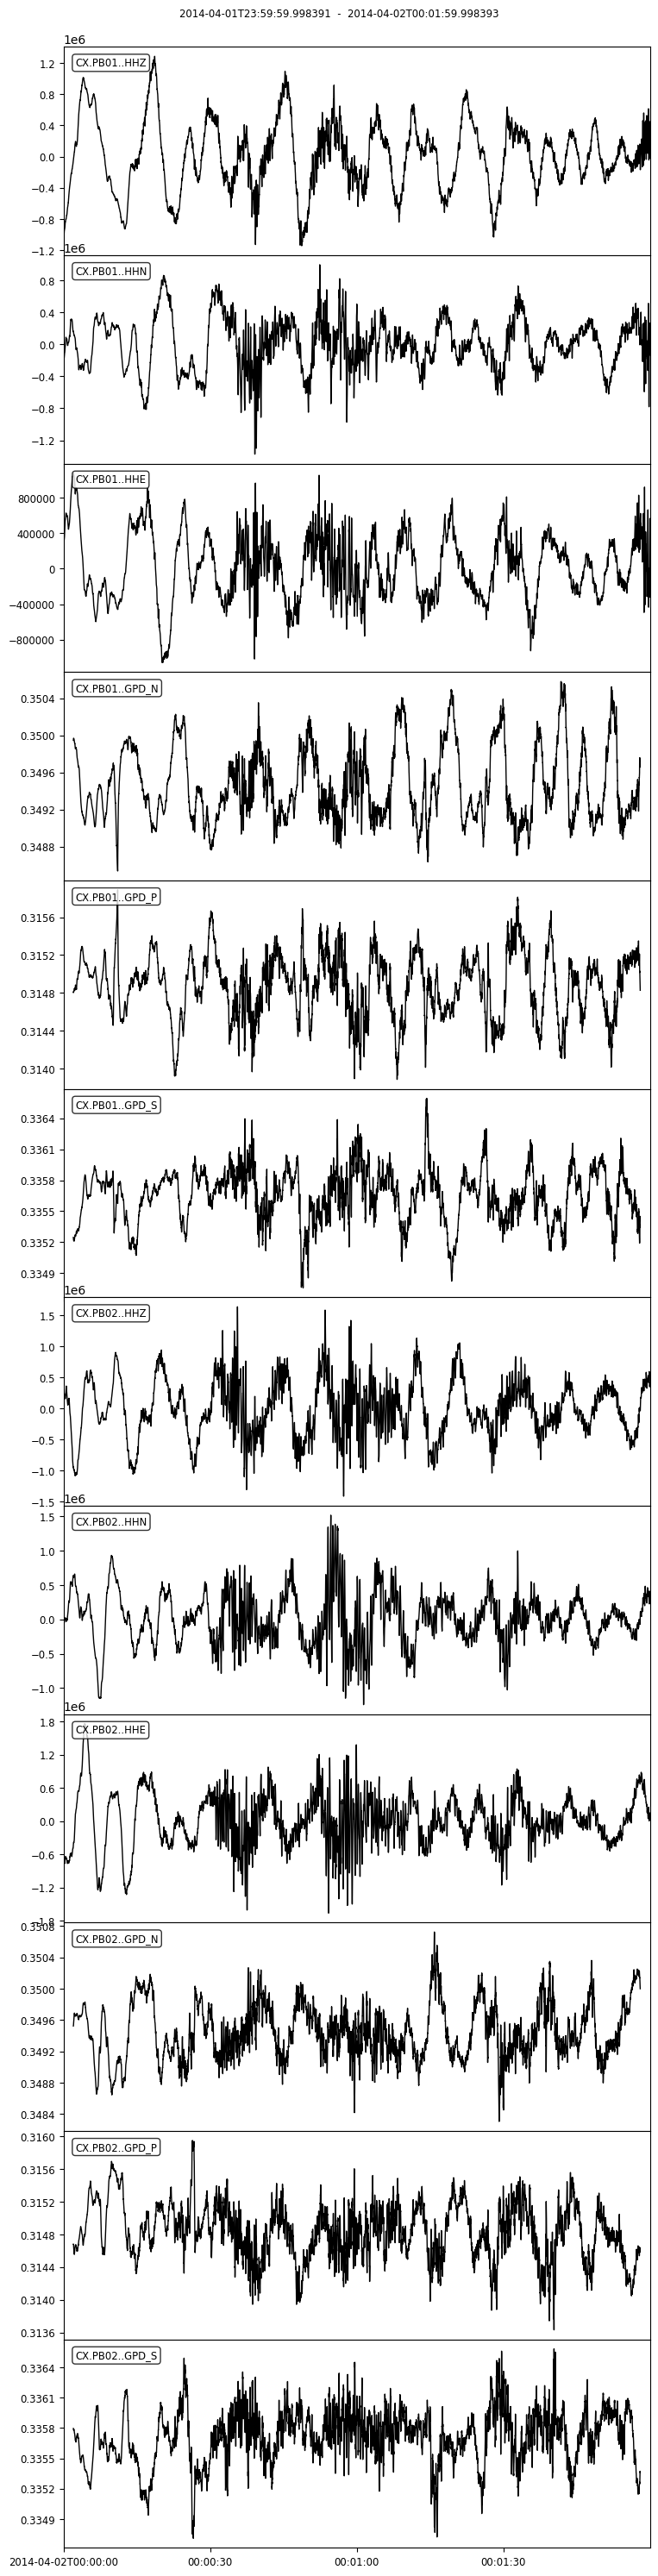

In [15]:
(stream + annotations).plot(equal_scale=False);